<table style="width:98%">
  <tr style="background-color:#FFFFFF">
    <td width ="59%">
        <h1 style="font-size:3vw;color:#A00000;text-align:center">
        Autonomous Soil Exploration System using Artificial Curiosity
        </h1>
        <h1 style="font-size:2vw;color:#A00000;text-align:center">
        <font style="font-family:Snell Roundhand, cursive;color:darkgreen">
            Graphs for Diffusion and Pollution
        </font>
        </h1>
        <h1 style="font-size:1.2vw;color:#A00000;text-align:center">
        Prof. Goren Gordon, Philippe Artsztein
        </h1>
    </td>
    <td width ="39%"><img src="./MyLogo.jpg" width="100%" height="100%" style="float:left;vertical-align:bottom;margin: 20px 20px"></td>
  </tr>
</table>

<table style="width:100%">
  <tr style="background-color:#FFFF88">
    <td style="text-align:left">
        <font style="font-size:2.0vw;font-weight: bold;text-decoration: underline;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        Section 1
        </font>
        <font style="font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        <br>&#x1405; 2D Diffusion Synthetic Field Generator Class
        </font>
    </td>
  </tr>
</table>

In [1]:
# http://rpdata.caltech.edu/courses/aph162/2007/Protocols/diffusion.pdf
import GeneralFunctions as gf
import math
import sys
MyNum= sys.version_info[0]+sys.version_info[1]/10
gf.ThePrint_1Header_1Variable_Point1('Python Version =', MyNum)

ᐅ Python Version =       3.9


In [2]:
class MySimpleSyntheticFieldGeneratorClass:
    # Class Initial Field Parameters:
    def __init__(self, XfieldMin, XfieldMax, YfieldMin, YfieldMax, 
                       Xsource, Ysource, DiffusionCoefficient, Pollution, DeltaTime):
        # Create storage allocation for Variable and initial its values 
        self.XfieldMin           = XfieldMin
        self.XfieldMax           = XfieldMax 
        self.YfieldMin           = YfieldMin
        self.YfieldMax           = YfieldMax 
        self.Xsource             = Xsource 
        self.Ysource             = Ysource
        self.DiffusionCoefficient= DiffusionCoefficient 
        self.Pollution           = Pollution
        self.DeltaTime           = DeltaTime
        self.MergeDiffusionTime  = DiffusionCoefficient*DeltaTime
        
    def PrintInputData(self):
        gf.ThePrint_2Header_2Variable_Point1('XfieldMin            =', self.XfieldMin,           '   XfieldMax=', self.XfieldMax)
        gf.ThePrint_2Header_2Variable_Point1('YfieldMin            =', self.YfieldMin,           '   YfieldMax=', self.YfieldMax)
        gf.ThePrint_2Header_2Variable_Point1('Xsource              =', self.Xsource,             '   Ysource  =', self.Ysource)
        gf.ThePrint_2Header_2Variable_Point1('Diffusion Coefficient=', self.DiffusionCoefficient,'   Pollution=', self.Pollution)
        gf.ThePrint_1Header_1Variable_Point1('Pollution Delta Time =', self.DeltaTime)
        gf.ThePrint_1Header_1Variable_Point1('Merge Diffusion Time =', self.MergeDiffusionTime)
        
    def PrintData(self):
        gf.ThePrint_2Header_2Variable_Point1('Xsource              =', self.Xsource,             '   Ysource  =', self.Ysource)
        gf.ThePrint_2Header_2Variable_Point1('Diffusion Coefficient=', self.DiffusionCoefficient,'   Pollution=', self.Pollution)
        gf.ThePrint_1Header_1Variable_Point1('Pollution Delta Time =', self.DeltaTime)
        gf.ThePrint_1Header_1Variable_Point1('Merge Diffusion Time =', self.MergeDiffusionTime)

    def SetPollutionDeltaTime(self, DeltaTime):
        self.DeltaTime= DeltaTime

    def CalculateSyntheticField(self, Xrover, Yrover):
        SourceDistantFromRover= math.sqrt(math.pow(self.Xsource-Xrover,2)+math.pow(self.Ysource-Yrover,2))
        SourceDistantFromRoverPower2= math.pow(SourceDistantFromRover,2)
        Numerator  = math.exp(-SourceDistantFromRoverPower2/(4.0*self.MergeDiffusionTime))
        Denominator= 4.0*math.pi*self.MergeDiffusionTime
        Pollution  = self.Pollution*Numerator/Denominator
        return Pollution

    def CalculateEstimateField(self, Xrover, Yrover, Xsource, Ysource, MergeDiffusionTime, Pollution):
        SourceDistantFromRover= math.sqrt(math.pow(Xsource-Xrover,2)+math.pow(Ysource-Yrover,2))
        SourceDistantFromRoverPower2= math.pow(SourceDistantFromRover,2)
        Numerator  = math.exp(-SourceDistantFromRoverPower2/(4.0*MergeDiffusionTime))
        Denominator= 4.0*math.pi*MergeDiffusionTime
        Pollution  = Pollution*Numerator/Denominator
        return Pollution

    def ObjectiveFunction(self, ObjectiveVector):
        SourceDistantFromRover= math.sqrt(math.pow(ObjectiveVector[2]-ObjectiveVector[0],2)+math.pow(ObjectiveVector[3]-ObjectiveVector[1],2))
        SourceDistantFromRoverPower2= math.pow(SourceDistantFromRover,2)
        Numerator  = math.exp(-SourceDistantFromRoverPower2/(4.0*ObjectiveVector[4]))
        Denominator= 4.0*math.pi*ObjectiveVector[4]
        Pollution  = ObjectiveVector[5]*Numerator/Denominator
        return Pollution


In [3]:
Mssfgc= MySimpleSyntheticFieldGeneratorClass(
    XfieldMin=0.0, XfieldMax=1000.0, YfieldMin=0.0, YfieldMax=1000.0, 
    Xsource=500.0, Ysource=500.0, DiffusionCoefficient=2.0, Pollution=1000.0, DeltaTime=800.0)
gf.ThePrint_1Header_Underline('Real Parameters')
Mssfgc.PrintData()

ᐅ  Real Parameters 
ᐅ Xsource              =     500.0     Ysource  =     500.0
ᐅ Diffusion Coefficient=       2.0     Pollution=    1000.0
ᐅ Pollution Delta Time =     800.0
ᐅ Merge Diffusion Time =    1600.0


<table style="width:100%">
  <tr style="background-color:#FFFF88">
    <td style="text-align:left">
        <font style="font-size:2.0vw;font-weight: bold;text-decoration: underline;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        Section 2
        </font>
        <font style="font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        <br>&#x1405; 1D Cross Section Pollution Distrebution 
        </font>
    </td>
  </tr>
</table>

In [4]:
# Importing Data Manipulation and Graphic visualization packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Do not show stupid annoying matplotlib warnings :( I Don't Care !, Nobody Cares ! 
# https://www.youtube.com/watch?v=_bhJzXTf6KE&ab_channel=SuperorganismVEVO
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

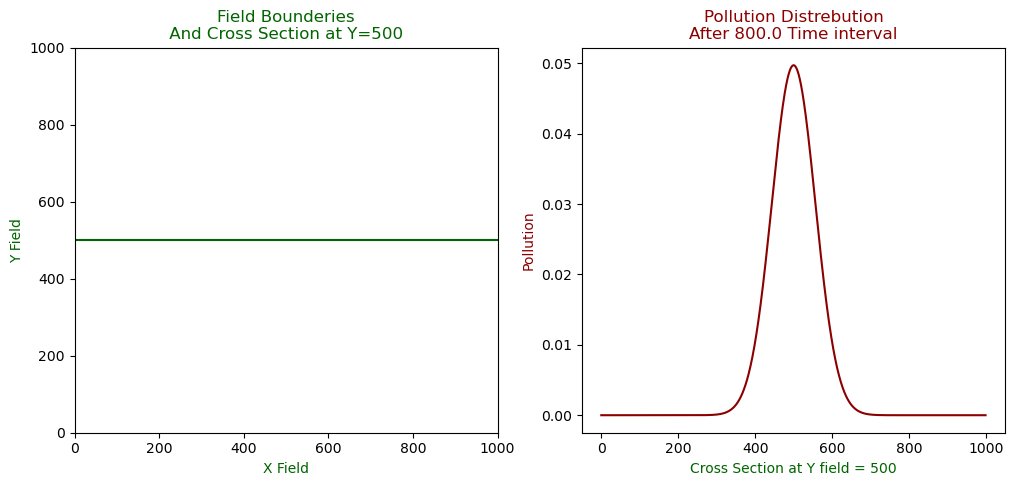

In [5]:
sns.set_color_codes()
fig, (ax1,ax2)= plt.subplots(ncols=2, nrows=1, figsize=(12,5))

My_x_cs= []
My_y_cs= []
for xxx in range(1000):
    My_x_cs.append(xxx)
    My_y_cs.append(500.0)

My_xx_cs = np.array(My_x_cs)
My_yy_cs = np.array(My_y_cs)

g=sns.lineplot(x=My_xx_cs, y=My_yy_cs, color="darkGreen", ax=ax1)
MyString= "Field Bounderies\n And Cross Section at Y=500 "
g.set_title(MyString, fontsize=12, color="darkgreen")
g.set_ylabel('Y Field', fontsize=10, color="darkgreen")
g.set_xlabel('X Field', fontsize=10, color="darkgreen")
g.set_xlim(0, 1000)
g.set_ylim(0, 1000)


My_Pollution = []
My_x= []
for xxx in range(1000):
    My_x.append(xxx)
    My_Pollution.append(Mssfgc.CalculateSyntheticField(xxx,500.0))

My_xx = np.array(My_x)
My_pp = np.array(My_Pollution)

g=sns.lineplot(x=My_xx, y=My_pp, color="darkred", ax=ax2)
MyString= "Pollution Distrebution\nAfter "+ str(Mssfgc.DeltaTime)+" Time interval"
g.set_title(MyString, fontsize=12, color="darkred")
g.set_ylabel('Pollution', fontsize=10, color="darkred")
g.set_xlabel('Cross Section at Y field = 500', fontsize=10, color="darkgreen")

plt.show()

<table style="width:100%">
  <tr style="background-color:#FFFF88">
    <td style="text-align:left">
        <font style="font-size:2.0vw;font-weight: bold;text-decoration: underline;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        Section 3
        </font>
        <font style="font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        <br>&#x1405; Calculating Synthetic Field Pollution at Rover Position
        </font>
    </td>
  </tr>
</table>

In [6]:
GlobalXrover= 400.0
GlobalYrover= 500.0

In [7]:
MySampling= Mssfgc.CalculateSyntheticField(GlobalXrover,GlobalYrover)

gf.ThePrint_1Header_Underline('Rover Sampling')
gf.ThePrint_2Header_2Variable_Point1('XRover            =', GlobalXrover, '   YRover  =', GlobalYrover)
gf.ThePrint_1Header_1Variable('Rover Measurement =     ', MySampling )

ᐅ  Rover Sampling 
ᐅ XRover            =     400.0     YRover  =     500.0
ᐅ Rover Measurement =       0.010425215122951942


In [8]:
My_Rover_X = np.array([GlobalXrover])
My_Rover_Y = np.array([GlobalYrover])
My_Source_X= np.array([Mssfgc.Xsource])
My_Source_Y= np.array([Mssfgc.Ysource])

(0.0, 1000.0)

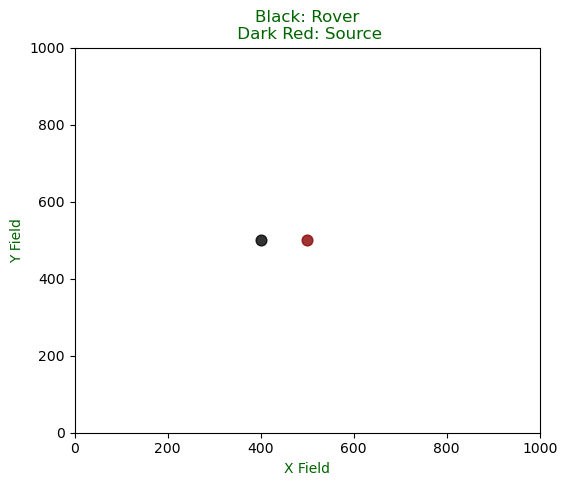

In [9]:
fig, ax1= plt.subplots(ncols=1, nrows=1, figsize=(6,5))

g=sns.regplot(x=My_Rover_X, y=My_Rover_Y, color="Black", scatter=True, fit_reg=False, marker='o', scatter_kws={"s": 60}, ax=ax1)
g=sns.regplot(x=My_Source_X, y=My_Source_X, color="darkRed", scatter=True, fit_reg=False, marker='o', scatter_kws={"s": 60}, ax=ax1)

MyString= "Black: Rover\n Dark Red: Source"
g.set_title(MyString, fontsize=12, color="darkgreen")
g.set_ylabel('Y Field', fontsize=10, color="darkgreen")
g.set_xlabel('X Field', fontsize=10, color="darkgreen")
g.set_xlim(0, 1000)
g.set_ylim(0, 1000)


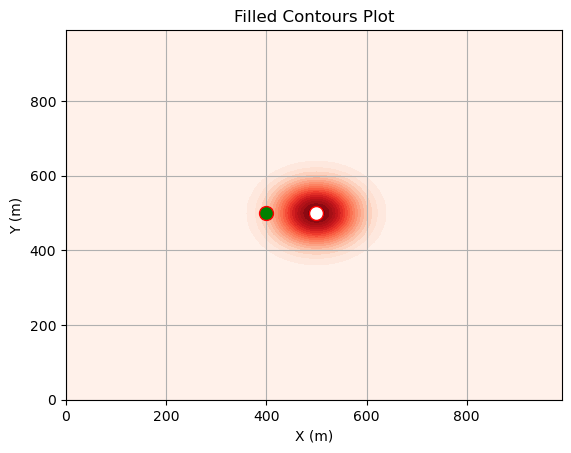

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Xc=[]
Yc=[]
Zc=[]
for iii in range(0,1000,10):
    for jjj in range(0,1000,10):
        Xc.append(float(iii))
        Yc.append(float(jjj))
        Zc.append(Mssfgc.CalculateSyntheticField(float(iii),float(jjj)))
Xr = np.array([GlobalXrover])
Yr = np.array([GlobalYrover])
Xs= np.array([Mssfgc.Xsource])
Ys= np.array([Mssfgc.Ysource])
        
        
fig, ax = plt.subplots(1)
ax.tricontourf(Xc, Yc, Zc,20, cmap='Reds')
ax.plot(Xr, Yr, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
ax.plot(Xs, Ys, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="white")
#fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
plt.grid()
plt.show()
